In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df

,Temperature,Outlook,Humidity,Windy,Played?
0,Mild,Sunny,80,No,Yes
1,Hot,Sunny,75,Yes,No
2,Hot,Overcast,77,No,Yes
3,Cool,Rain,70,No,Yes
4,Cool,Overcast,72,Yes,Yes
5,Mild,Sunny,77,No,No
6,Cool,Sunny,70,No,Yes
7,Mild,Rain,69,No,Yes
8,Mild,Sunny,65,Yes,Yes
9,Mild,Overcast,77,Yes,Yes


In [4]:
df.dtypes

Temperature    object
Outlook        object
Humidity        int64
Windy          object
Played?        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Temperature    14 non-null object
Outlook        14 non-null object
Humidity       14 non-null int64
Windy          14 non-null object
Played?        14 non-null object
dtypes: int64(1), object(4)
memory usage: 640.0+ bytes


In [6]:
df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Outlook', 'Windy'])

In [7]:
df_getdummy

,Humidity,Played?,Temperature_Cool,Temperature_Hot,Temperature_Mild,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Windy_No,Windy_Yes
0,80,Yes,0,0,1,0,0,1,1,0
1,75,No,0,1,0,0,0,1,0,1
2,77,Yes,0,1,0,1,0,0,1,0
3,70,Yes,1,0,0,0,1,0,1,0
4,72,Yes,1,0,0,1,0,0,0,1
5,77,No,0,0,1,0,0,1,1,0
6,70,Yes,1,0,0,0,0,1,1,0
7,69,Yes,0,0,1,0,1,0,1,0
8,65,Yes,0,0,1,0,0,1,0,1
9,77,Yes,0,0,1,1,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_getdummy.drop('Played?',axis=1)
y = df_getdummy['Played?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn.tree import plot_tree

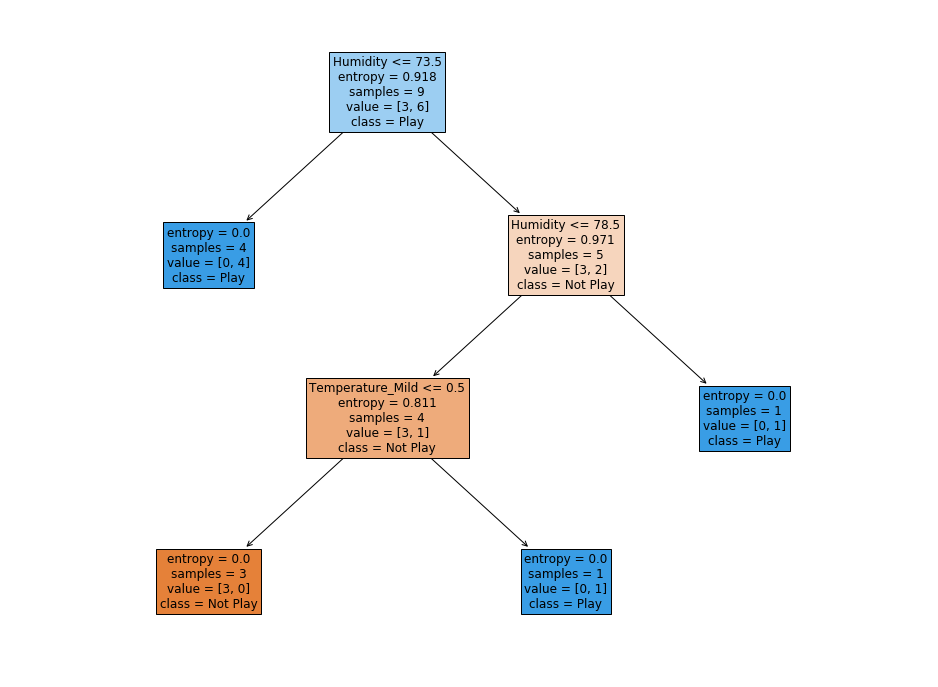

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not Play', 'Play'])

In [40]:
from sklearn.metrics import f1_score

In [41]:
### Print F1 scores on all 3 sets: training, validation and holdout
# <your code here>
print(f1_score(y_true=y_train, y_pred=dtree.predict(X_train)))
print(f1_score(y_true=y_test, y_pred=dtree.predict(X_test)))


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['No', 'Yes'], dtype='<U3')